# dataframeのplot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [3]:
'''
最初のカラムにindexがすでに入っているのでindex_colを指定して読み込む。
'''

wine_df = pd.read_csv("../winemag-data_first150k.csv.zip", index_col=0)

pd.set_option("display.max_colwidth", 200)
wine_df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,"This tremendous 100% varietal wine hails from Oakville and was aged over three years in oak. Juicy red-cherry fruit and a compelling hint of caramel greet the palate, framed by elegant, fine tanni...",Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are softened and sweetened by a slathering of oaky chocolate and vanilla. This is full, layered, intense and cushioned on the palate, with rich flavors of...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,"Mac Watson honors the memory of a wine once made by his mother in this tremendously delicious, balanced and complex botrytised white. Dark gold in color, it layers toasted hazelnut, pear compote a...",Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, and incorporates fruit from Ponzi's Aurora, Abetina and Madrona vineyards, among others. Aromatic, dense and toasty, it deftly blends aromas and flavors...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named after the highest point in the vineyard at 1200 feet. It has structure, density and considerable acidity that is still calming down. With 18 months in wo...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


## 1変数

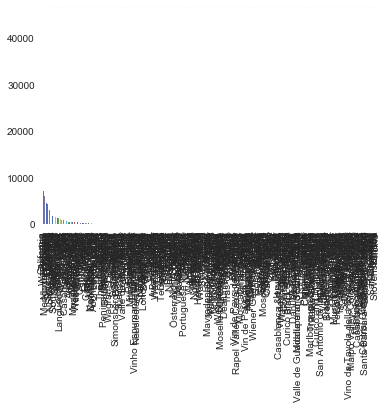

In [4]:
#provinceの頻度を棒グラフにする
wine_df['province'].value_counts().plot.bar()

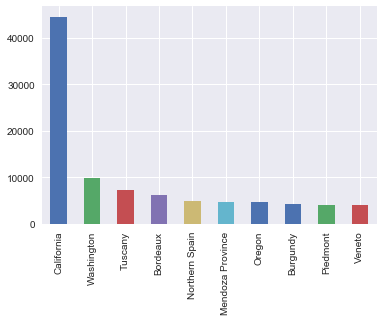

In [5]:
#上位10個だけ表示
wine_df['province'].value_counts().head(10).plot.bar()

pandasのplotはmatplotlibのオブジェクトを返してくるので軸名は次のように付与できる

Text(0,0.5,'frequency')

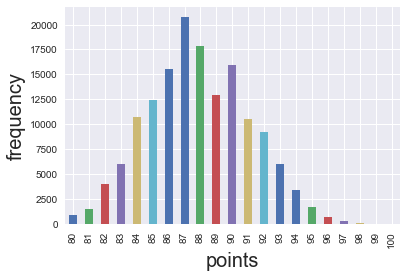

In [6]:
ax = wine_df['points'].value_counts().sort_index().plot.bar()

ax.set_xlabel("points", fontsize=20) #fontsizeを指定して文字の大きさを変えることが可能
ax.set_ylabel("frequency", fontsize=20)

## ヒストグラム

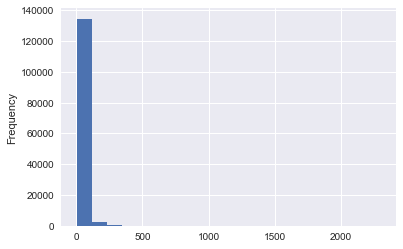

In [7]:
wine_df['price'].plot.hist(bins=20)#priceをbinsに指定した数だけ分割して表示

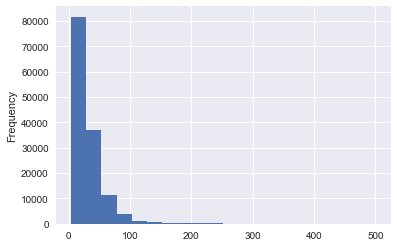

In [8]:
wine_df.query('price <= 500').price.plot.hist(bins=20)#priceをbinsに指定した数だけ分割して表示。

## 2変数

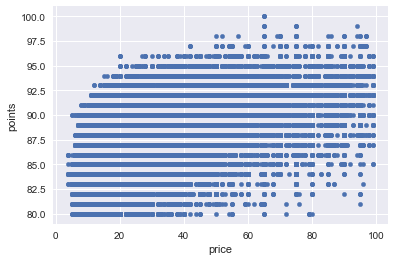

In [9]:
#散布図
wine_df.query('price < 100').plot.scatter(x='price', y='points')

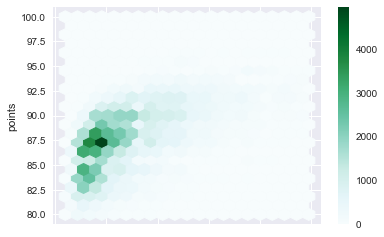

In [10]:
# ヒートマップ
wine_df.query('price < 100').plot.hexbin(x='price', y='points', gridsize=20)

## seaborn

In [11]:
import seaborn as sns

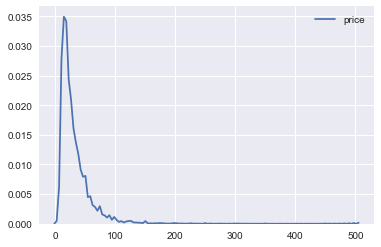

In [12]:
'''
カーネル密度推定（KDE）という手法を用いてヒストグラムから確率密度を求める。
'''
sns.kdeplot(wine_df.query('price <= 500').price)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


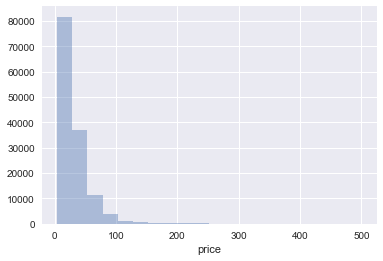

In [13]:
# displot: pandasのヒストグラムと等価
sns.distplot(wine_df.query('price <= 500').price, bins=20, kde=False)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


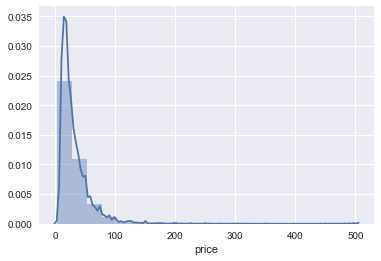

In [14]:
# kde=TrueにするとKDEにより求めた確率密度関数も一緒にプロットされる（デフォルトだとTrue）
sns.distplot(wine_df.query('price <= 500').price, bins=20, kde=True)

## 箱ひげ図

In [15]:
'''
データ内で多く出現するvarietyのTOP3を取り出す

['Chardonnay',
 'Pinot Noir',
 'Cabernet Sauvignon']
 
'''
variety_top3 = list(wine_df.variety.value_counts().head(n=3).index)

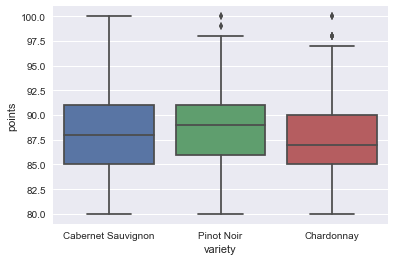

In [16]:
sns.boxplot(
    x='variety',
    y='points',
    data=wine_df.query('variety in @variety_top3')
)

- violin plot
    - 変数（ここではvariety）に対する数値変数（ここではpoints）の分布（正確にはKDEによって求めた確率密度関数）を併せてプロット

※ただし、数値変数がある値域でスカスカな場合でもKDEを使うと無理やりそこを補間してプロットしてしまうので場合によっては間違った解釈しないように箱ひげ図も併せて確認した方が良い

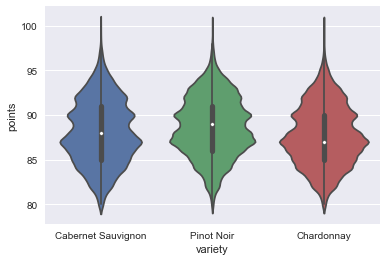

In [17]:
sns.violinplot(
    x='variety',
    y='points',
    data=wine_df.query('variety in @variety_top3')
)

## 3変数 (2数値変数 + 1カテゴリ変数)

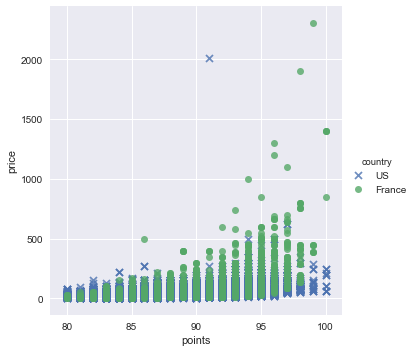

In [18]:
## 生産国がアメリカ、フランスそれぞれに対してprice vs pointsの図をプロット
sns.lmplot(x='points', y='price', hue='country', 
           markers=['x', 'o'],
           fit_reg=False, data=wine_df.query('country in ["US", "France"]')) #fit_reg=Trueにすると回帰曲線も描画される

- 機械学習で2値分類するときは必ずやる分析
    - 予測したいTARGETの２値に対して特徴量の傾向がどのように変わるのか把握しておかなければより進んだ特徴量エンジニアリング・モデリング・評価データセット作成が行えないため
- 特徴量の数が多くなければ（10個程度）全ての組み合わせに対して行うべき
- 組合せ数が巨大になる場合は素の特徴量をLightGBMなどのアルゴリズムに投げて重要な特徴量の組み合わせのみを対象にして分析をして更に特徴量を作る、など

関連
- SHAP
    - 予測結果に対する特徴量の寄与を求める手法
    - https://orizuru.io/blog/machine-learning/shap/

## 3変数 (全て数値変数)

In [20]:
pokemon = pd.read_csv("../Pokemon.csv", index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


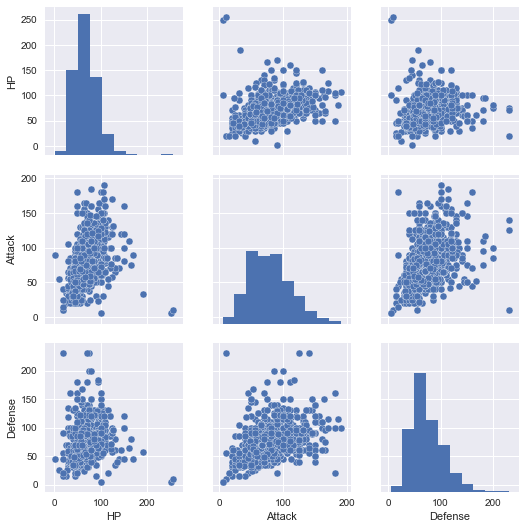

In [22]:
# pairplot: 特徴量同士の関係を可視化
sns.pairplot(pokemon[['HP', 'Attack', 'Defense']])

## 数値変数の相関行列をヒートマップにする

In [ ]:
# corr: 相関行列
pokemon.loc[:, ['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']].corr()

- 上記は分類問題の精度評価をする際、混同行列(Confusion Matrix)を可視化するときにもよく使う

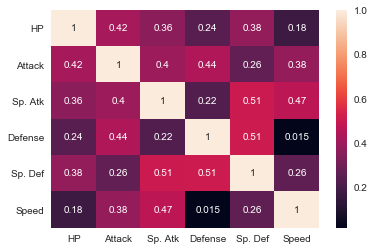

In [23]:
sns.heatmap(
    pokemon.loc[:, ['HP', 'Attack', 'Sp. Atk', 'Defense', 'Sp. Def', 'Speed']].corr(),
    annot=True #これをTrueにしないと相関係数が表示されないので必ずTrueにする
)

## 円グラフ

Text(0.5,1,'Pokemon Type 1')

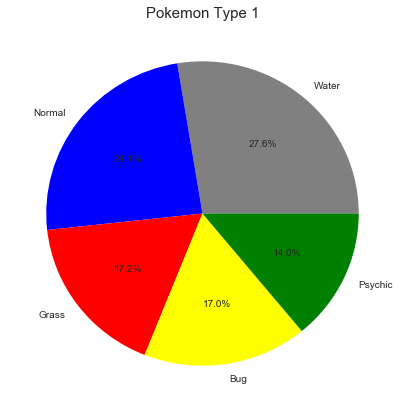

In [26]:
labels = pokemon['Type 1'].value_counts().head().index
colors = ['grey','blue','red','yellow','green']

explode = [0,0,0,0,0]
sizes = pokemon['Type 1'].value_counts().head().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Pokemon Type 1', fontsize = 15)